In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
from sklearn.metrics import classification_report,confusion_matrix

In [97]:
urlprefix = 'https://vincentarelbundock.github.io/Rdatasets/csv/' 
dataname = 'datasets/iris.csv'
iris = pd.read_csv(urlprefix + dataname)
iris = iris.drop("Unnamed: 0", 1)

In [98]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [99]:
X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [100]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth=3, random_state=0)
clf = clf.fit(X_train, y_train)

In [101]:
print(confusion_matrix(y_test,clf.predict(X_test))) #混淆矩陣準確性

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [102]:
clf.predict(X_test)

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [103]:
y_test

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [104]:
clf.score(X_test,y_test)

0.9777777777777777

In [105]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

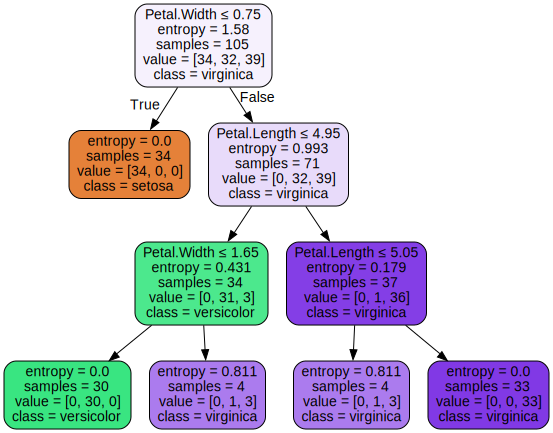

In [96]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=list(iris.columns)[:4],  
                                class_names=clf.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
'''透過決策樹分類，準確度0.9778，下列為找到的規則:
1. 花瓣寬 ≤ 0.75，能夠分類setosa
2. 花瓣長 ≤ 4.95 & 0.75 ≤ 花瓣寬 ≤ 1.65，能夠分類versicolor
3. 花瓣長 ≤ 4.95 & 1.65 ≤ 花瓣寬，能夠分類virginica
4. 4.95 ≤ 花瓣長，能夠分類virginica